In [1]:
import pystac
items = pystac.ItemCollection.from_file("search.json")
items

In [2]:
import rioxarray

In [3]:
item = items[0]
assets = item.assets
assets.keys()

dict_keys(['aot', 'blue', 'coastal', 'granule_metadata', 'green', 'nir', 'nir08', 'nir09', 'red', 'rededge1', 'rededge2', 'rededge3', 'scl', 'swir16', 'swir22', 'thumbnail', 'tileinfo_metadata', 'visual', 'wvp', 'aot-jp2', 'blue-jp2', 'coastal-jp2', 'green-jp2', 'nir-jp2', 'nir08-jp2', 'nir09-jp2', 'red-jp2', 'rededge1-jp2', 'rededge2-jp2', 'rededge3-jp2', 'scl-jp2', 'swir16-jp2', 'swir22-jp2', 'visual-jp2', 'wvp-jp2'])

In [10]:
nir09 = assets['nir09']
nir09.href

'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/31/U/FU/2020/3/S2A_31UFU_20200328_1_L2A/B09.tif'

In [11]:
raster_ams_b9 = rioxarray.open_rasterio(nir09.href)
raster_ams_b9

<xarray.DataArray (band: 1, y: 1830, x: 1830)>
[3348900 values with dtype=uint16]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 6e+05 6.001e+05 6.002e+05 ... 7.097e+05 7.098e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [12]:
print(raster_ams_b9.rio.crs)

EPSG:32631


In [13]:
print(raster_ams_b9.rio.bounds())

(600000.0, 5790240.0, 709800.0, 5900040.0)


In [14]:
print(raster_ams_b9.rio.height, raster_ams_b9.rio.width)

1830 1830


In [15]:
print(raster_ams_b9.rio.nodata)

0


In [16]:
raster_ams_b9.values

array([[[    0,     0,     0, ..., 10061, 10200, 10172],
        [    0,     0,     0, ..., 10424, 10315,  9763],
        [    0,     0,     0, ..., 10328, 10648, 10405],
        ...,
        [    0,     0,     0, ...,  4298,  4343,  4315],
        [    0,     0,     0, ...,  4284,  4284,  4155],
        [    0,     0,     0, ...,  3935,  3545,  3958]]], dtype=uint16)

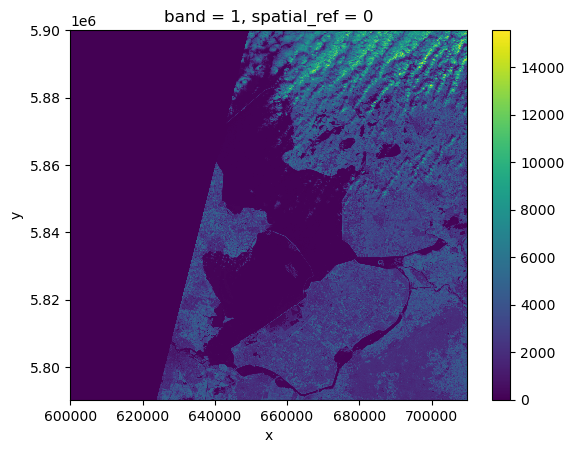

In [17]:
raster_ams_b9.plot()

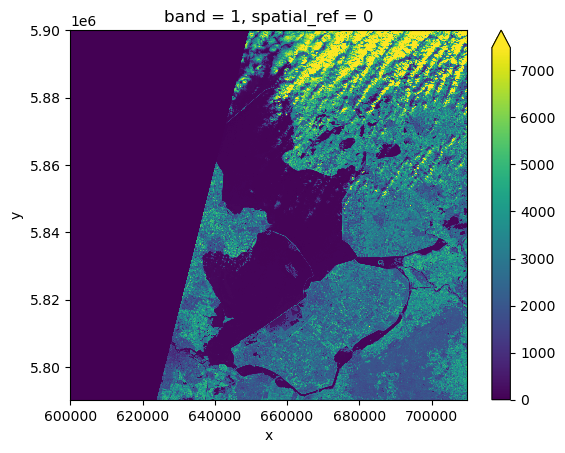

In [18]:
raster_ams_b9.plot(robust=True)

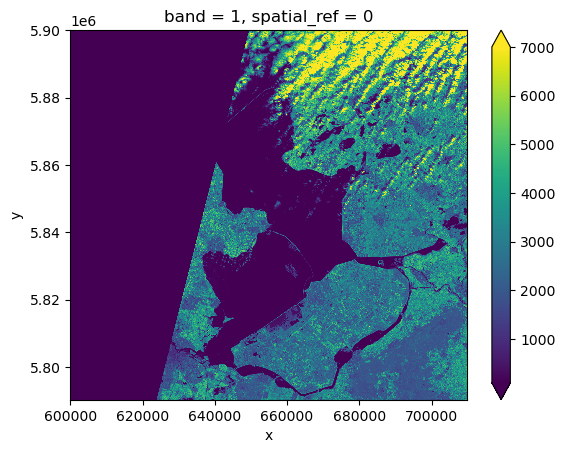

In [19]:
raster_ams_b9.plot(vmin=100, vmax=7000)

In [20]:
raster_ams_b9 = rioxarray.open_rasterio(nir09.href, masked=True)

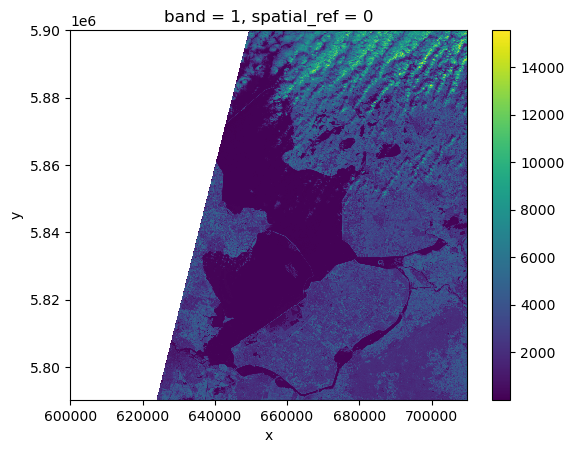

In [21]:
raster_ams_b9.plot()

In [22]:
raster_ams_b9.values

array([[[   nan,    nan,    nan, ..., 10061., 10200., 10172.],
        [   nan,    nan,    nan, ..., 10424., 10315.,  9763.],
        [   nan,    nan,    nan, ..., 10328., 10648., 10405.],
        ...,
        [   nan,    nan,    nan, ...,  4298.,  4343.,  4315.],
        [   nan,    nan,    nan, ...,  4284.,  4284.,  4155.],
        [   nan,    nan,    nan, ...,  3935.,  3545.,  3958.]]],
      dtype=float32)

In [25]:
print(raster_ams_b9.max())
print(raster_ams_b9.min())

nan
nan


In [33]:
visual = assets['visual']
raster_ams_visual = rioxarray.open_rasterio(visual.href, overview_level=3)

In [34]:
raster_ams_visual

<xarray.DataArray (band: 3, y: 687, x: 687)>
[1415907 values with dtype=uint8]
Coordinates:
  * band         (band) int32 1 2 3
  * x            (x) float64 6.001e+05 6.002e+05 ... 7.096e+05 7.097e+05
  * y            (y) float64 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int32 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [35]:
raster_ams_visual.shape

(3, 687, 687)

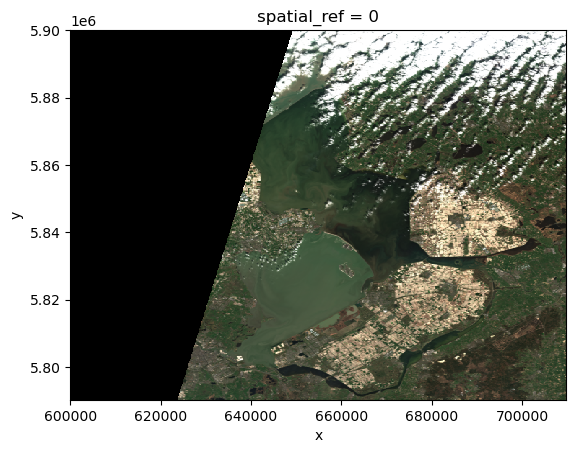

In [38]:
raster_ams_visual.plot.imshow()

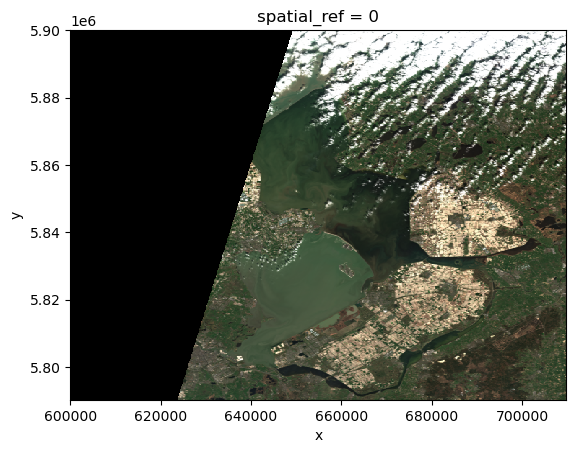

In [37]:
raster_ams_visual.plot.imshow()

In [39]:
from pyproj import CRS

In [40]:
epsg = raster_ams_b9.rio.crs.to_epsg()

In [41]:
epsg

32631

In [45]:
raster_ams_b9.rio.crs

CRS.from_epsg(32631)

In [46]:
crs = CRS(epsg)

In [47]:
crs

<Projected CRS: EPSG:32631>
Name: WGS 84 / UTM zone 31N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 0°E and 6°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Andorra. Belgium. Benin. Burkina Faso. Denmark - North Sea. France. Germany - North Sea. Ghana. Luxembourg. Mali. Netherlands. Niger. Nigeria. Norway. Spain. Togo. United Kingdom (UK) - North Sea.
- bounds: (0.0, 0.0, 6.0, 84.0)
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [48]:
crs.name

'WGS 84 / UTM zone 31N'

In [49]:
crs.area_of_use

AreaOfUse(west=0.0, south=0.0, east=6.0, north=84.0, name='Between 0°E and 6°E, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Andorra. Belgium. Benin. Burkina Faso. Denmark - North Sea. France. Germany - North Sea. Ghana. Luxembourg. Mali. Netherlands. Niger. Nigeria. Norway. Spain. Togo. United Kingdom (UK) - North Sea.')

In [50]:
crs.axis_info

[Axis(name=Easting, abbrev=E, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=N, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [52]:
raster_ams_b9.rio.width

1830

In [54]:
raster_ams_b9[0,500:1000,500:1000].rio.to_raster("data/nir09_subset.tif")